In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py


In [2]:
fp22 = h5py.File('output22.hdf','r')
fp33 = h5py.File('output33.hdf','r')

In [3]:
print(fp22.keys())

<KeysViewHDF5 ['errors', 'loglr', 'shm']>


In [6]:
fp22['shm'].keys()

<KeysViewHDF5 ['sh2']>

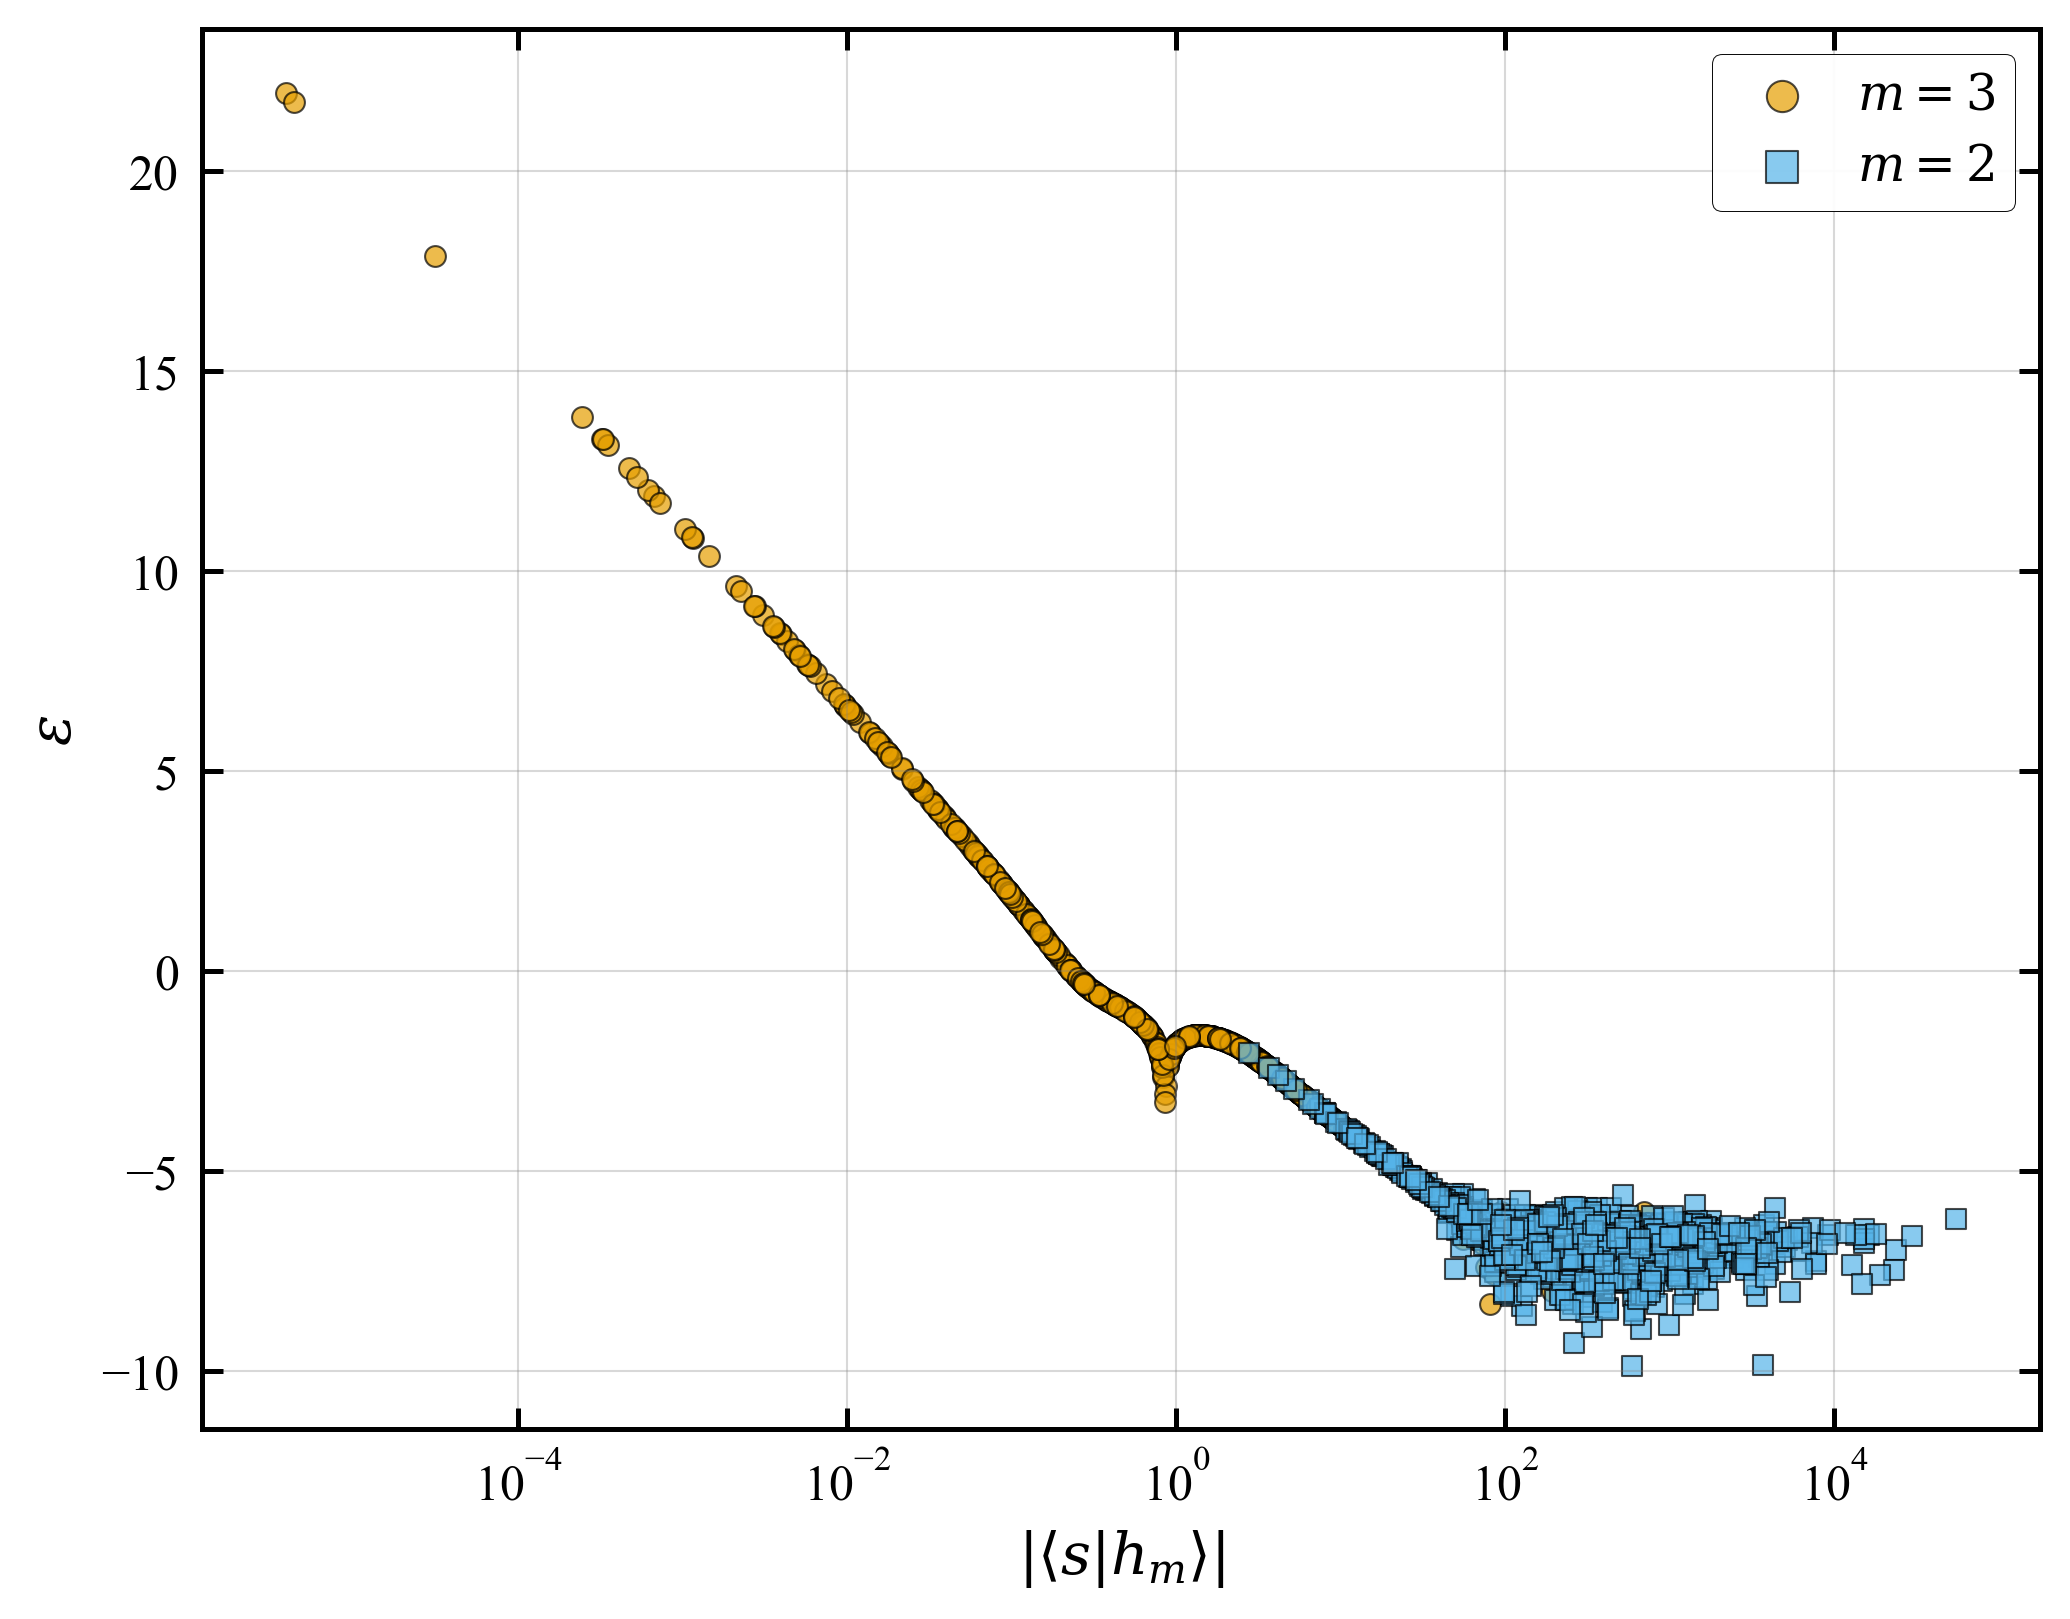

In [20]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set publication-quality style
plt.style.use('seaborn-v0_8-paper')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Serif']
mpl.rcParams['mathtext.fontset'] = 'dejavuserif'
mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['xtick.major.width'] = 1.2
mpl.rcParams['ytick.major.width'] = 1.2
mpl.rcParams['xtick.minor.width'] = 0.8
mpl.rcParams['ytick.minor.width'] = 0.8
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['ytick.minor.size'] = 3

# Create figure with appropriate size for journal (single column ~3.5", double column ~7")
fig, ax = plt.subplots(figsize=(7, 5.5), dpi=300)

# Plot with distinct, colorblind-friendly colors
colors = ['#E69F00', '#56B4E9']  # Orange and blue - colorblind safe
markers = ['o', 's']

ax.scatter(fp33['shm']['sh3'], fp33['errors'], 
           label=r'$m=3$',
           s=25, alpha=0.7, 
           color=colors[0], 
           marker=markers[0],
           edgecolors='black',
           linewidths=0.5)

ax.scatter(fp22['shm']['sh2'], fp22['errors'], 
           label=r'$m=2$',
           s=25, alpha=0.7, 
           color=colors[1], 
           marker=markers[1],
           edgecolors='black',
           linewidths=0.5)

ax.set_xscale('log')

ax.set_xlabel(r'$|\langle s | h_{m} \rangle|$', fontsize=14)
ax.set_ylabel(r'$\epsilon$', fontsize=14)

ax.tick_params(labelsize=12, which='both', direction='in', top=True, right=True)

ax.grid(True, which='major', linestyle='-', linewidth=0.5, alpha=0.3, color='gray')
ax.grid(True, which='minor', linestyle=':', linewidth=0.3, alpha=0.2, color='gray')

ax.legend(loc='best', frameon=True, framealpha=0.95, 
          edgecolor='black', fontsize=12, 
          markerscale=1.5, handletextpad=0.5)

ax.set_facecolor('white')
fig.patch.set_facecolor('white')

plt.tight_layout()

plt.show()

# fig.savefig('figure.pdf', dpi=300, bbox_inches='tight', format='pdf')
fig.savefig('accuracy.png', dpi=300, bbox_inches='tight')